In [2]:
import pandas as pd

In [3]:
originalDf = pd.read_csv('cybercola.csv', delimiter=',', on_bad_lines='skip') # We will skip the last line who is missing data and is not in correct format
originalDf.head()

,Unnamed: 0,Fecha,Pedido #,Ingresos netos (con formato),Estado,Tipo de cliente,Producto(s),Artículos vendidos,Cupón(es),Ingresos netos,Atribución,Número de factura
0,0,2024-07-15 23:53:14,66088,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
1,1,2024-07-15 23:16:02,66087,"40,01€",completed,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
2,2,2024-07-15 22:38:49,66085,"40,01€",recogida,returning,"2× Cybercola Cherry - Botella 33cl, 1× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
3,3,2024-07-15 22:08:13,66083,"40,00€",completed,returning,"1× Cybercola Cherry - Botella 33cl, 2× Cyberco...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN
4,4,2024-07-15 22:00:16,66082,"40,00€",completed,returning,"3× Cybercola Light - Botella 33 cl., 1× Cyberc...",4,NaN,33.06,Fuente: Amigos+Cybercola+Barcelona,NaN


In [4]:
# Print of feature types
print(originalDf.dtypes)

Unnamed: 0                        int64
Fecha                            object
Pedido #                          int64
Ingresos netos (con formato)     object
Estado                           object
Tipo de cliente                  object
Producto(s)                      object
Artículos vendidos               object
Cupón(es)                       float64
Ingresos netos                   object
Atribución                       object
Número de factura               float64
dtype: object


In [5]:
unique_estado = originalDf['Estado'].unique()
unique_client_type = originalDf['Tipo de cliente'].unique()
unique_cupones = originalDf['Cupón(es)'].unique()
unique_atribucion = originalDf['Atribución'].unique()
unique_factura = originalDf['Número de factura'].unique()
unique_atribution = originalDf['Atribución'].unique()

print("Estados:\n", unique_estado)
print("Tipos cliente:\n ", unique_client_type)
print("Cupones:\n", unique_cupones)
print("Atribuciónes:\n", unique_atribucion)
print("Facturas:\n", unique_factura)
print('Atribución:\n', unique_atribucion)

Estados:
 ['completed' 'recogida' 'refunded' 'enrutado']
Tipos cliente:
  ['returning' 'new']
Cupones:
 [nan]
Atribuciónes:
 ['Fuente: Amigos+Cybercola+Barcelona' 'Orgánico: Google'
 'Referido: Mailchi.mp' 'Directo' 'Fuente: Google'
 'Referido: Comunidadmsm.es' 'Referido: Bing.com'
 'Administrador de la web' 'Fuente: Cyb' 'Desconocido'
 'Referido: Com.google.android.gm']
Facturas:
 [nan]
Atribución:
 ['Fuente: Amigos+Cybercola+Barcelona' 'Orgánico: Google'
 'Referido: Mailchi.mp' 'Directo' 'Fuente: Google'
 'Referido: Comunidadmsm.es' 'Referido: Bing.com'
 'Administrador de la web' 'Fuente: Cyb' 'Desconocido'
 'Referido: Com.google.android.gm']


The features collected are:

**Fecha**: the date of the order

**Pedido #**: id of the order

**Ingresos netos(con formato)**: ---

**Estado**: state of the order, it could be completed, recogida, refunded or enrutado
Completed -> the order was delivered successfully
Recogida -> Awaiting 

**Tipo de cliente**: type of client that makes the order, it could be returning or new

**Producto(s)**: name of products included in the order, is a string of strings sepparated by ','

**Artículos vendidos**: number of items sold in the order, it counts de number of products

**Cupón(es)**: discount code, all Nan

**Ingresos netos**: --

**Atribución**: source of the client order

**Número de factura**: number of the bill, all Nan

In [6]:
# Split the 'Producto(s)' column by separator ',' explode into individual rows and count them
allProducts = originalDf['Producto(s)'].str.split(',').explode().str.strip() # Last strip is for the case there is white spaces
productCounts = allProducts.value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
print(productCounts)


                                  Product  Count
0          1× Cybercola Light - Lata 33cl   1138
1     1× Cybercola Light - Botella 33 cl.   1136
2      1× Cybercola Cherry - Botella 33cl   1123
3         1× Cybercola Cherry - Lata 33cl   1027
4        1× Cybercola Zero - Botella 33cl    946
..                                    ...    ...
216   28× Cybercola Cherry - Botella 33cl      1
217  44× Cybercola Light - Botella 33 cl.      1
218       7× Cybercola Cherry - Lata 33cl      1
219      1× Caja Regalo 2023-  3 botellas      1
220     55× Cybercola Zero - Botella 33cl      1

[221 rows x 2 columns]


In [7]:
# Remove the quantity prefix of products and count them
allProductsCleaned = allProducts.apply(lambda x: x.split('×')[-1].split('x')[-1].strip() if isinstance(x, str) else x)
productCounts = allProductsCleaned.value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
print(productCounts)

                                             Product  Count
0                         Cybercola Zero - Lata 33cl   2389
1                   Cybercola Light - Botella 33 cl.   2384
2                        Cybercola Light - Lata 33cl   2320
3                       Cybercola Cherry - Lata 33cl   2269
4                    Cybercola Cherry - Botella 33cl   2158
5                      Cybercola Zero - Botella 33cl   2072
6                                          periencia    653
7                                     Cybercola Pika    575
8                        LA GILDA DEL NORTE (anchoa)    556
9                                              irene    474
10               LA GILDA DEL NORTE (anchoa picante)    453
11                                        Cyberpepsi    429
12         Cybercola Zero – Lata 33cl Edición Verano    267
13                    Cybercola Zero - Cuarto (25cl)    258
14                                Cybercola Sirimiri    223
15                   Caja vasos cervecer

In [17]:
expandedProducts = []

for item in allProducts:
    if isinstance(item, str): # Check is not Nan
        parts = item.split('×') if '×' in item else item.split('x') # Extract x or ×
        #TODO: check two digits and negative
        if len(parts) > 1 and parts[0].isdigit(): # We know that first character will be the number of articles
            quantity = int(parts[0].strip())
            productName = parts[1].strip()
        else:
            quantity = 1
            productName = item.strip()

        expandedProducts.extend([productName] * quantity)

expandedProductsDf = pd.DataFrame(expandedProducts, columns=['Product'])

# Count appeared times of each product
productCounts = expandedProductsDf['Product'].value_counts().reset_index()
productCounts.columns = ['Product', 'Count']
print(productCounts)

['Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Cherry - Botella 33cl', 'Cybercola Cherry - Botella 33cl']
['Cybercola Light - Botella 33 cl.']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Cherry - Botella 33cl', 'Cybercola Cherry - Botella 33cl']
['Cybercola Light - Botella 33 cl.']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Cherry - Botella 33cl']
['Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Cherry - Botella 33cl']
['Cybercola Zero - Botella 33cl']
['Cybercola Txirene']
['Cybercola Zero – Lata 33cl Edición Verano']
['Cybercola Light - Botella 33 cl.', 'Cybercola Light - Botella 33 cl.']
['Cybercola Cher

In [9]:
# MIRAR NEGATIUS, ALOMILLOR NO ELS HAURIA DE COMPTAR COM A PEDIDOS

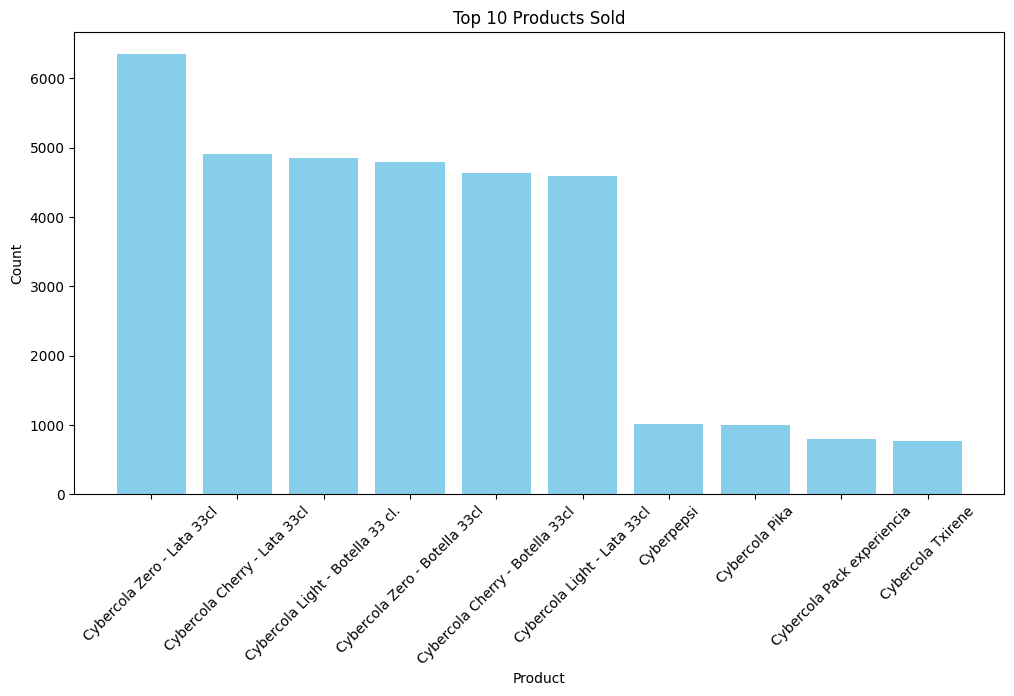

In [10]:
import matplotlib.pyplot as plt

# Sort products by count and select the top 10 for visualization
top_products = productCounts.sort_values(by='Count', ascending=False).head(10)

# Plotting the top 10 products
plt.figure(figsize=(12, 6))
plt.bar(top_products['Product'], top_products['Count'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products Sold')
plt.xticks(rotation=45)
plt.show()


1- Number of clients and their average purchase and deviation from the average

As I don't have customer_id or anything to associate each order to a customer I approach this problem.
If we had a column with CIF or NIF, we would count the unique values and we will obtain the number of customers, for the average purchase we will group by CIF/NIF and calculate the average of each customer, once we have each average we would calculate the total average and deviation from it

In [11]:
# First of all, we count the number of new clients
# For this I substracted the refund rows, so I interpreted that if not I would be counting twice the same client
noRefundDf = originalDf[originalDf['Estado'] != 'refunded']
newCustomersCount = noRefundDf[noRefundDf['Tipo de cliente'] == 'new'].shape[0]

print("Number of new clients", newCustomersCount)

Number of new clients 2771


In [12]:
# The idea here is to see if the refund where orderes not strictly as the entire order
# Check it manually first as there is just 17, first 5 checked and pass
# CONTINUE LATER
newClientsDf = originalDf[originalDf['Tipo de cliente'] == 'new']
refundNewClientDf = newClientsDf[newClientsDf['Estado'] == 'refunded']
newClientsNoRefundDf = newClientsDf[newClientsDf['Estado'] != 'refunded']

refundNewClientDfSep = refundNewClientDf['Producto(s)'].str.split(',')
newClientsNoRefundDf = newClientsNoRefundDf['Producto(s)'].str.split(',')



In [13]:
# CALCULAR RETURN CUSTOMERS OF EACH MONTH TO MAYBE SEE APPROXIMATELY HOW MANY CUSTOMERS WE HAVE
# I THINK IT'S MAHOU
# EN LA ÚLTIMA PREGUNTA EL QUE HE DE FER ÉS CALCULAR LA MITJANA DE PREU OBTINGUT EN CADA PRODUCTE, ÉS A DIR SI TINC 4XCYBERCOLA A 40€ LA MITJANA PER CYBERCOLA SERIA DE 10€